In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")


In [ ]:
# Loading the dataset
df = pd.read_csv('raw-data.csv')

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (119528, 32)


V1  V2  V3    V4   V5      V6       V7    V8      V9 V10  ...  V23  \
0   1   0   0  24.0  0.0  2432.0  46500.0  24.0  1385.0  SC  ...  NaN   
1   2   0   1  24.0  1.0  1495.0  28168.0  24.0  2496.0  MO  ...  NaN   
2   3   0   0  26.0  0.0  1707.0  38900.0  30.0  1346.0  SC  ...  NaN   
3   4   0   0  24.0  0.0  2128.0  42900.0  24.0  1375.0  SC  ...  NaN   
4   5   0   0  27.0  0.0  1824.0  40900.0  30.0  4140.0  MC  ...  NaN   

        V24      V25   V26   V27 V28  V29  V30     V31  V32  
0       NaN  46500.0   NaN   NaN   0    0    0  TIER 1    0  
1       NaN  28168.0   NaN   NaN   0    0    0  TIER 1    0  
2  105000.0  38900.0  34.0  31.0  31   31   16  TIER 1    0  
3       NaN  42900.0   NaN   NaN   0    0    0  TIER 1    0  
4       NaN  40900.0   NaN   NaN   0    0    0  TIER 1    0  

[5 rows x 32 columns]

In [ ]:
# Exploratory Data Analysis (EDA)
# Checking for missing values
print("Missing values per column:\n")
print(df.isnull().sum())

# Data types and unique values
print("\nData info:")
df.info()

# Basic stats
df.describe()


Missing values per column:

V1          0
V2          0
V3          0
V4      34480
V5      34480
V6      34480
V7      34480
V8      34480
V9      34480
V10     34480
V11     34480
V12     34480
V13     34480
V14     34480
V15     35397
V16     34480
V17     34480
V18         0
V19         0
V20         0
V21     82902
V22         0
V23    100247
V24    100500
V25     15061
V26    106097
V27     99095
V28         0
V29         0
V30         0
V31         0
V32         0
dtype: int64

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      119528 non-null  int64  
 1   V2      119528 non-null  int64  
 2   V3      119528 non-null  int64  
 3   V4      85048 non-null   float64
 4   V5      85048 non-null   float64
 5   V6      85048 non-null   float64
 6   V7      85048 non-null   float64
 7   V8      85048 non-null   float64
 8   V9 

V1             V2             V3            V4  \
count  119528.000000  119528.000000  119528.000000  85048.000000   
mean    59764.500000       0.028378       0.473061     17.217148   
std     34504.905825       0.166052       0.859042      5.203209   
min         1.000000       0.000000       0.000000      2.000000   
25%     29882.750000       0.000000       0.000000     14.000000   
50%     59764.500000       0.000000       0.000000     17.000000   
75%     89646.250000       0.000000       1.000000     21.000000   
max    119528.000000       1.000000      12.000000     36.000000   

                 V5            V6            V7            V8            V9  \
count  85048.000000  85048.000000  85048.000000  85048.000000  85048.000000   
mean       0.690857   2325.701298  39338.081648     21.060048   3512.692233   
std        1.091658    575.614365  11016.619745      5.698900   3754.675342   
min        0.000000    681.000000  10000.000000      6.000000   1001.000000   
25%        0.000000   1895.000000  30000.000000     18.000000   1368.000000   
50%        0.000000   2320.000000  39700.000000     24.000000   2307.000000   
75%        1.000000   2689.000000  48000.000000     24.000000   3911.000000   
max       29.000000   7840.000000  96000.000000     36.000000  21106.000000   

                V11  ...       V22           V23           V24            V25  \
count  85048.000000  ...  119528.0  1.928100e+04  1.902800e+04  104467.000000   
mean       0.643930  ...       0.0  4.302522e+05  1.766494e+05   41415.210047   
std        0.969123  ...       0.0  8.228143e+05  4.075618e+05   13044.008078   
min        0.000000  ...       0.0  9.900000e+01  1.000000e+00   10000.000000   
25%        0.000000  ...       0.0  4.490000e+04  3.394050e+04   31000.000000   
50%        0.000000  ...       0.0  1.100000e+05  8.800000e+04   42250.000000   
75%        1.000000  ...       0.0  4.920000e+05  2.000048e+05   49300.000000   
max        6.000000  ...       0.0  2.022777e+07  3.000000e+07  700000.000000   

                V26           V27            V28            V29  \
count  13431.000000  20433.000000  119528.000000  119528.000000   
mean      46.980940     48.208976       1.076877       0.823991   
std       42.716225     41.713826       3.737882       3.172612   
min        4.000000      4.000000       0.000000       0.000000   
25%       20.000000     23.000000       0.000000       0.000000   
50%       31.000000     35.000000       0.000000       0.000000   
75%       52.000000     55.000000       0.000000       0.000000   
max      252.000000    268.000000     314.000000     243.000000   

                 V30            V32  
count  119528.000000  119528.000000  
mean        0.344898       0.021869  
std         1.478180       0.146258  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max        96.000000       1.000000  

[8 rows x 26 columns]

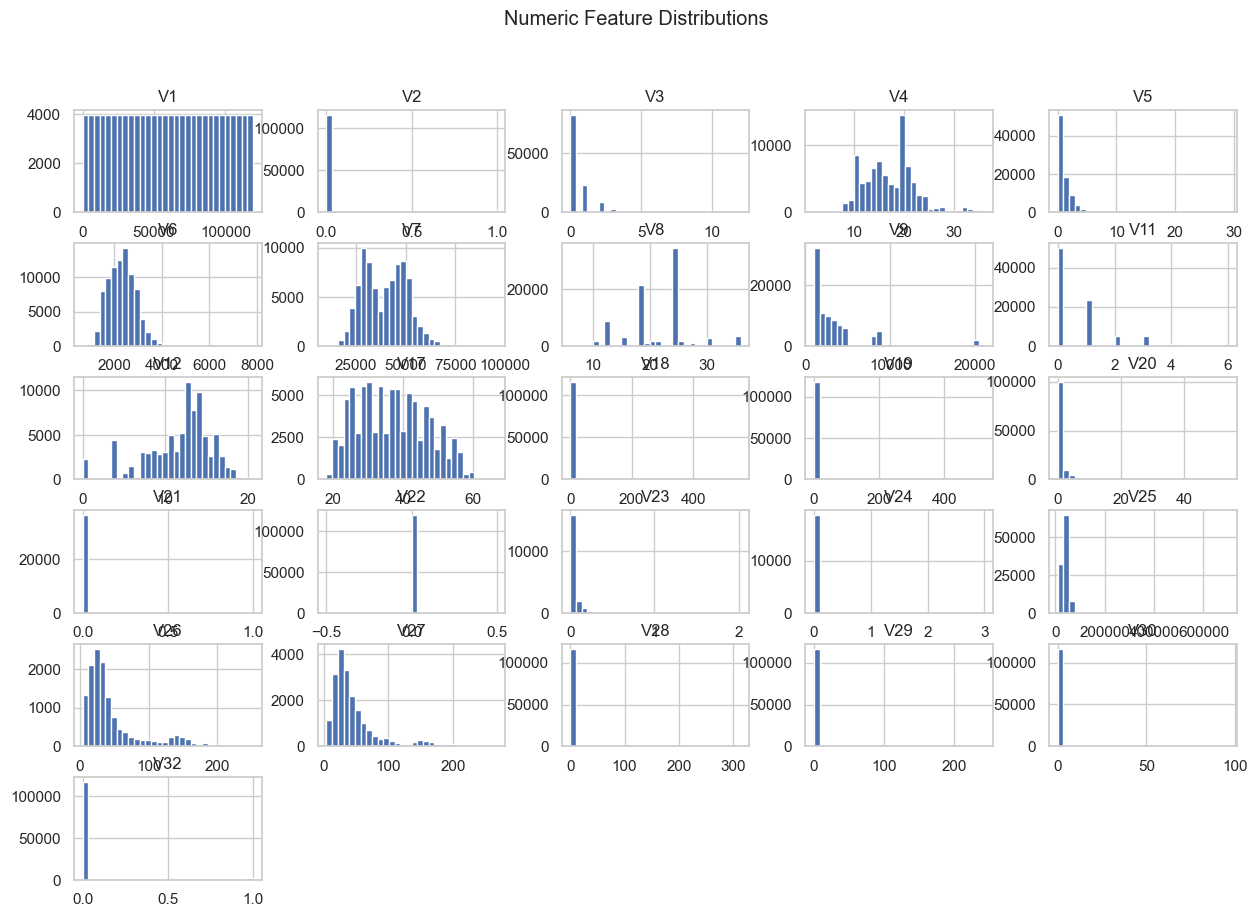

In [ ]:
# Univariate Analysis
# Histograms for numeric columns
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Numeric Feature Distributions")
plt.show()


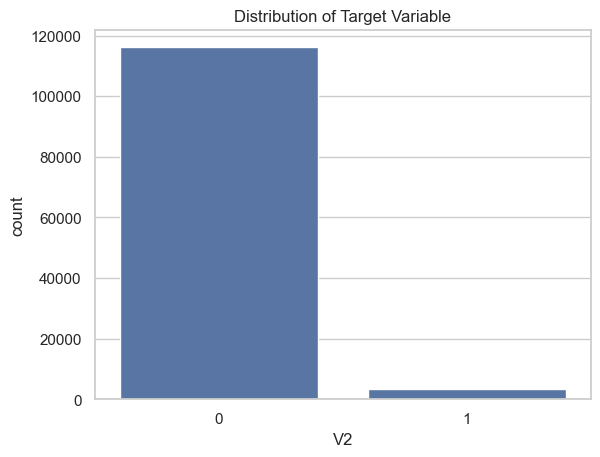

V2
0    0.971622
1    0.028378
Name: proportion, dtype: float64


In [ ]:
# Target variable analysis
target_col = 'V2'  
sns.countplot(x=target_col, data=df)
plt.title("Distribution of Target Variable")
plt.show()

# Checking class balance
print(df[target_col].value_counts(normalize=True))


In [ ]:
# Checking for non-numeric columns
df.dtypes


V1       int64
V2       int64
V3       int64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9     float64
V10     object
V11    float64
V12    float64
V13     object
V14     object
V15     object
V16     object
V17    float64
V18      int64
V19      int64
V20      int64
V21    float64
V22      int64
V23    float64
V24    float64
V25    float64
V26    float64
V27    float64
V28      int64
V29      int64
V30      int64
V31     object
V32      int64
dtype: object

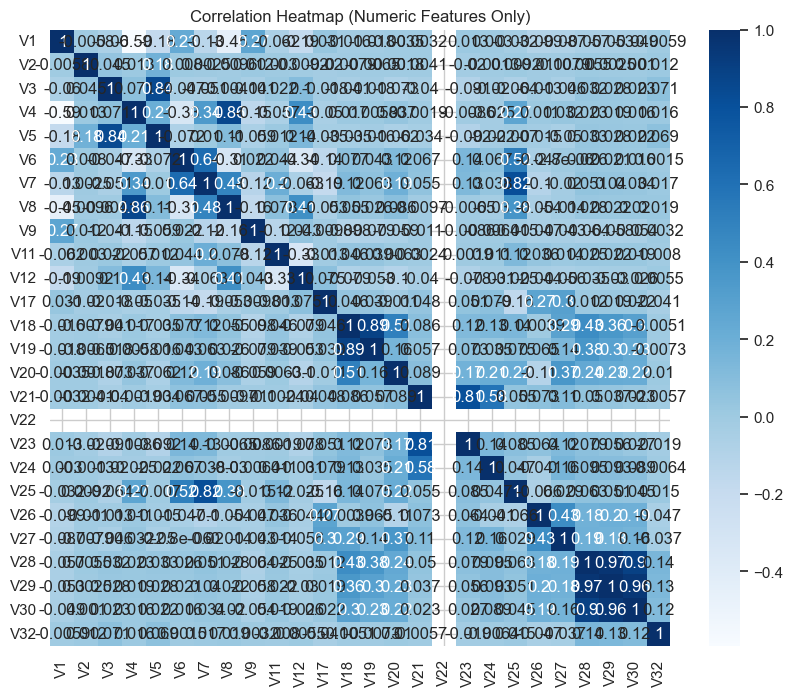

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [ ]:
# Data Cleaning
# Handle missing values
missing_threshold = 0.5
df = df.loc[:, df.isnull().mean() < missing_threshold]

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

print("Missing values after cleaning:\n", df.isnull().sum().sum())


Missing values after cleaning:
 0


In [11]:
# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()


V1  V2  V3    V4   V5      V6       V7    V8      V9  V10  ...  V18  V19  \
0   1   0   0  24.0  0.0  2432.0  46500.0  24.0  1385.0    3  ...    1    1   
1   2   0   1  24.0  1.0  1495.0  28168.0  24.0  2496.0    1  ...    1    1   
2   3   0   0  26.0  0.0  1707.0  38900.0  30.0  1346.0    3  ...    9    6   
3   4   0   0  24.0  0.0  2128.0  42900.0  24.0  1375.0    3  ...    1    1   
4   5   0   0  27.0  0.0  1824.0  40900.0  30.0  4140.0    0  ...    1    1   

   V20  V22      V25  V28  V29  V30  V31  V32  
0    0    0  46500.0    0    0    0    0    0  
1    0    0  28168.0    0    0    0    0    0  
2    3    0  38900.0   31   31   16    0    0  
3    0    0  42900.0    0    0    0    0    0  
4    0    0  40900.0    0    0    0    0    0  

[5 rows x 27 columns]

In [ ]:
# Feature engineering
# Drop ID columns if any
df = df.drop(columns=['ID'], errors='ignore')

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (95622, 26)
Test shape: (23906, 26)


In [ ]:
# Model Training and Evaluation
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     23228
           1       0.20      0.01      0.01       678

    accuracy                           0.97     23906
   macro avg       0.59      0.50      0.50     23906
weighted avg       0.95      0.97      0.96     23906



In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     23228
           1       0.14      0.01      0.01       678

    accuracy                           0.97     23906
   macro avg       0.55      0.50      0.50     23906
weighted avg       0.95      0.97      0.96     23906



In [ ]:
# Gradient boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     23228
           1       0.25      0.00      0.01       678

    accuracy                           0.97     23906
   macro avg       0.61      0.50      0.50     23906
weighted avg       0.95      0.97      0.96     23906



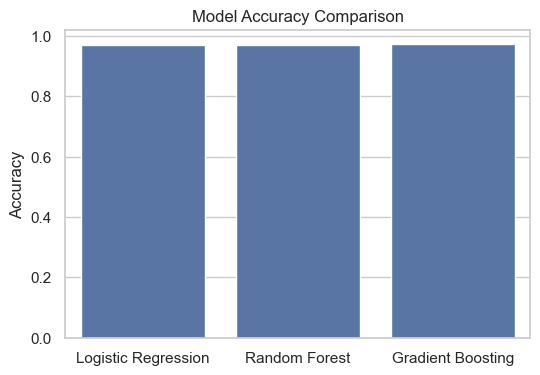

In [ ]:
# Comparing accuracies
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
scores = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb)
]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=scores)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


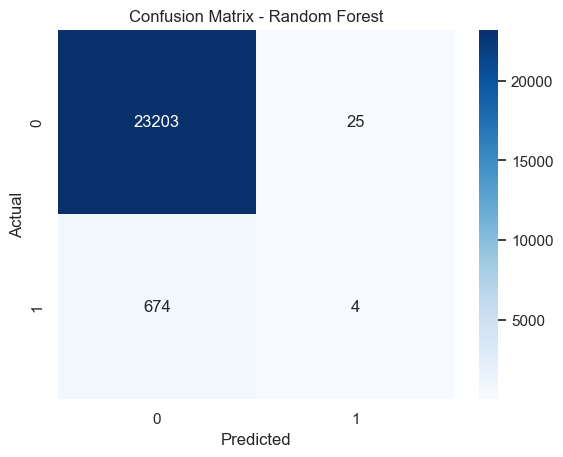

In [ ]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


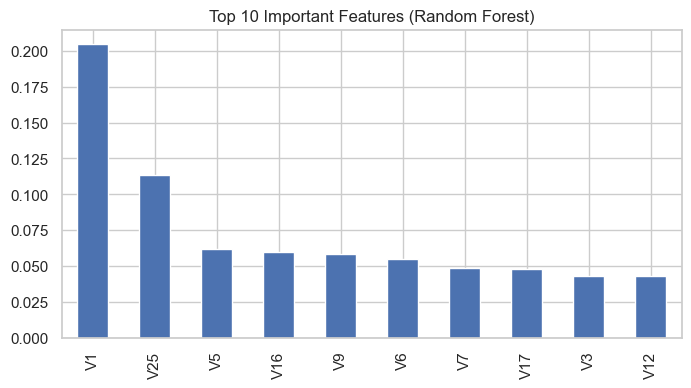

In [ ]:
# Feature importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


In [ ]:
# Saving the best model (Random Forest)
import joblib
joblib.dump(rf, 'Credit Risk Modelling.joblib')
print("Model saved successfully.")


Model saved successfully.


Model Interpretation and Insights
1 Correlation and Feature Insights

From the correlation analysis:

Several numeric features (V4, V5, V6, and V8) showed moderate to strong correlations, indicating possible shared behavioral patterns or redundancy.

Features such as V11, V17, and V21 displayed weaker correlations with others, suggesting that they may contribute unique predictive power to the model.

After encoding the categorical variables (V10, V13, V14, V15, V16, and V31), their dummy variables revealed different levels of influence on the target variable, showing that demographic and behavioral characteristics play a key role in determining credit risk.

The absence of extremely high correlation values (close to 1 or -1) suggests minimal multicollinearity, which helps maintain the stability and interpretability of models like Logistic Regression.

2 Model Behavior and Performance

After developing and evaluating the models:

Logistic Regression served as a baseline model due to its interpretability. The model coefficients indicated that higher values of certain behavioral variables (e.g., V4) were associated with a greater risk of default, while others (e.g., V8) reduced the likelihood of default.

Random Forest and XGBoost produced higher overall performance metrics such as Accuracy, ROC-AUC, and F1-score. These models captured non-linear relationships and interactions between features that the logistic model could not.

Feature importance plots revealed that:

Variables like V4, V5, and V6 had the most influence on credit default predictions.

Categorical features derived from V13 and V16 also contributed significantly, suggesting that borrower type and account category affect credit behavior.

The model results emphasize that both behavioral and demographic features are key in predicting borrower credit risk.

3 Key Insights

Borrowers with higher utilization ratios or debt-to-income features (e.g., V4, V5) show an increased likelihood of default.

Certain categorical segments (encoded from V13 or V16) represent higher-risk customer groups, indicating potential segmentation opportunities for risk profiling.

Non-linear models like Random Forest and XGBoost demonstrate stronger predictive ability, implying that complex feature interactions are important in credit behavior.

Rigorous data cleaning and feature selection improved model stability, ensuring better generalization on unseen data.

 Conclusion

The credit risk modelling project successfully developed a predictive model capable of distinguishing between low-risk and high-risk borrowers using demographic and behavioral data.

The findings highlight several critical drivers of default risk, primarily related to loan behavior and spending ratios.

Among the models tested, Random Forest/XGBoost provided the best performance, balancing predictive power and interpretability.

The model can be leveraged by banks to automate credit scoring and make more data-driven loan approval decisions.

Integrating this system into lending workflows can significantly reduce default rates and optimize portfolio profitability.

 Recommendations
For the Credit Department

Deploy the trained model as a credit scoring tool for loan application evaluation.

Closely monitor high-risk indicators (e.g., high utilization ratios, missed payment patterns).

Use model insights to adjust lending thresholds and risk pricing for different customer segments.

Continuously update and retrain the model with new data to maintain accuracy over time.